In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Imputation1 as imp

In [5]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [6]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)
print(partialAnswer.shape)

(631, 2)


Join train and test in total

In [7]:
total = pd.concat((train, test), axis=0)

Merge data Danceability by id

In [8]:
total.loc[total['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']

In [9]:
total.set_index('id', inplace= True)

In [10]:
total.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

In [11]:
total.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify',
       'Comments', 'Channel', 'Composer'],
      dtype='object')

EXTRACT NUMERICAL DATA

In [12]:
totalNumerical = total.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments']]

In [13]:
totalNumerical

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments
id,,,,,,,,,,,,
0,0.000273,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,NaN,1.376220e+05,1.998137e+07,3070.0
1,0.184220,NaN,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,1.848250e+05,5.190000e+03,NaN,122.0
2,NaN,-15.596000,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,122.0
3,0.209585,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,24350.0
4,NaN,NaN,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,3.166880e+08,1.299086e+06,NaN,31150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.0
23481,0.318585,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,4.572846e+07,7.227992e+04,1.365601e+07,448.0
23482,0.426223,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,NaN


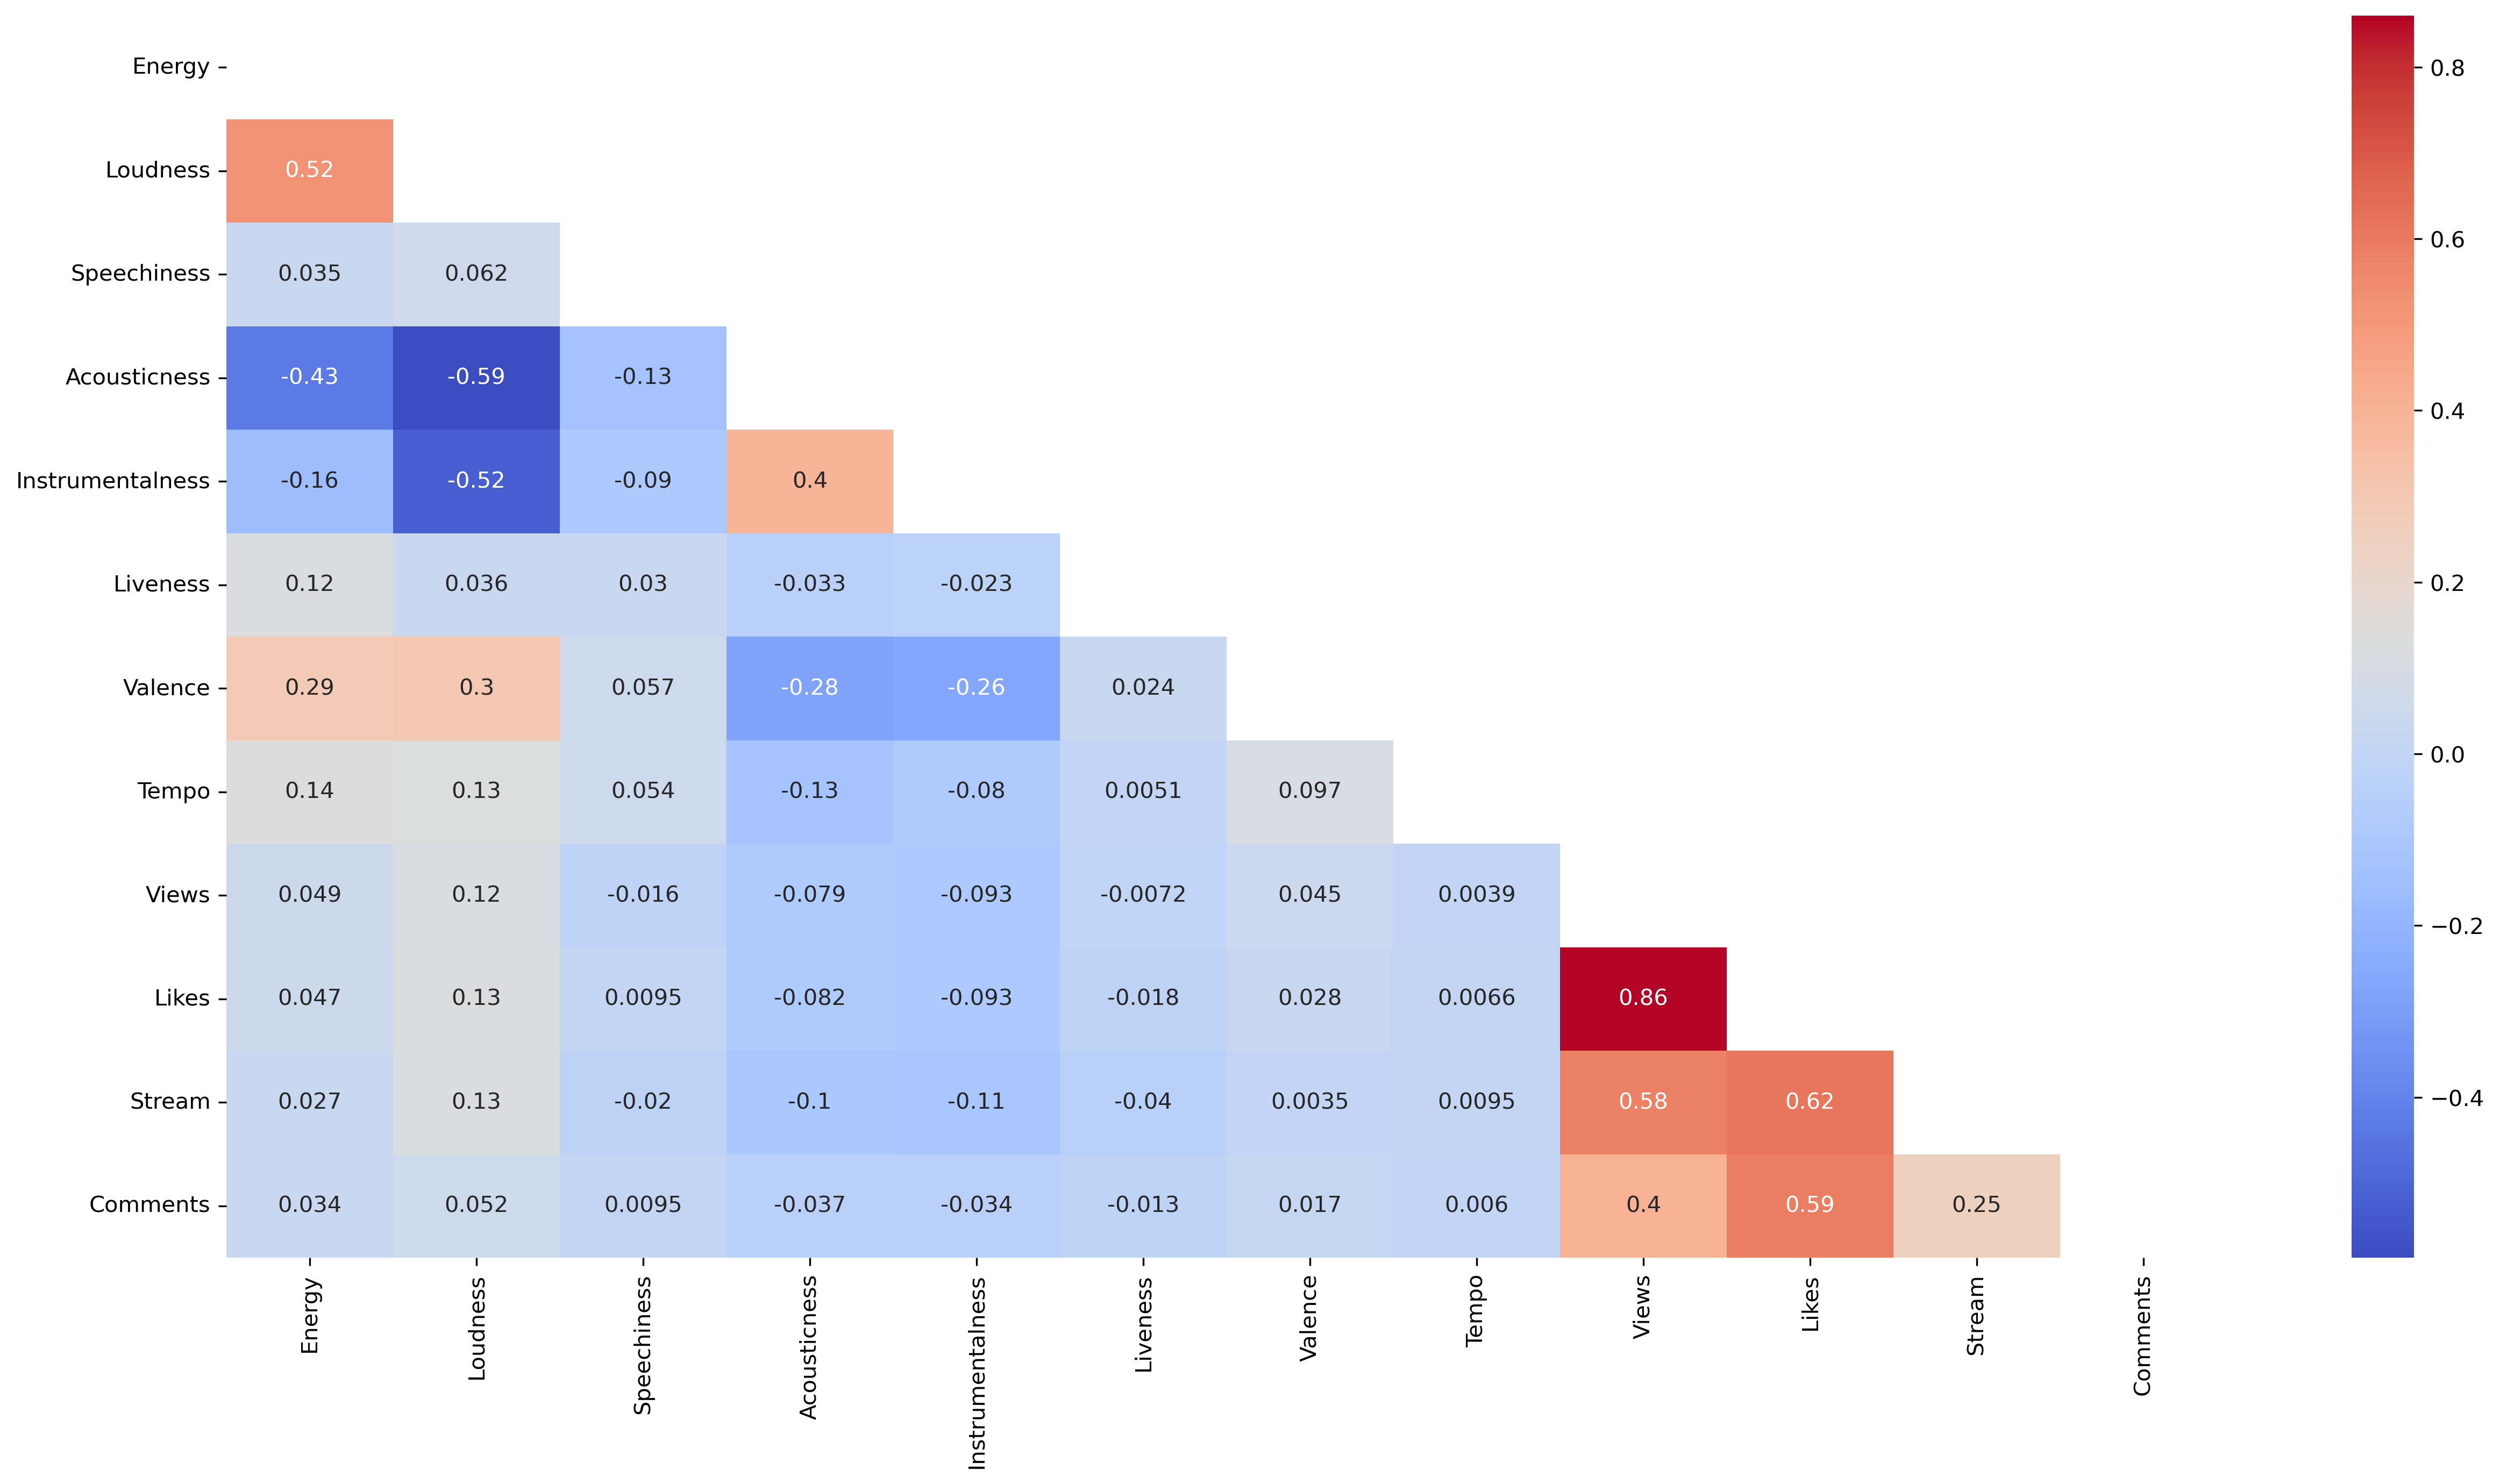

In [14]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNumerical.corr()))
dataplot = sns.heatmap(totalNumerical.corr(), cmap="coolwarm", annot=True, mask=mask)

In [15]:
totalNumerical.isnull().sum(0)

Energy              3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Views               3523
Likes               3523
Stream              3523
Comments            3523
dtype: int64

In [16]:
impute = imp.testImputate(totalNumerical)

In [17]:
impute.mice(10)

___ Processing Energy ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0307683


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 0.0315134
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0309917


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's l2: 0.0315212
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[32]	valid_0's l2: 0.0321222
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0331206


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's l2: 0.0307126
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 0.0312665
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[35]	valid_0's l2: 0.0308006
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0310388
___ Processing Loudness ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 7.03871
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[11]	valid_0's l2: 6.90639
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 7.19353
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's l2: 7.41141
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 7.04948
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 6.8922
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 6.62774
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[29]	valid_0's l2: 7.15115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's l2: 6.94683


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's l2: 6.86853
___ Processing Speechiness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.00853295
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.00868209
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 0.00839364
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[35]	valid_0's l2: 0.0085345
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0084999
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 0.00811477
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.00842754
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[24]	valid_0's l2: 0.00879512
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.00789056
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[22]	valid_0's l2: 0.00822955
___ Processing Acousticness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[45]	valid_0's l2: 0.0241882
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's l2: 0.0243635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0243461
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 0.024224
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 0.0241645
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0232486


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.024875
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 0.0241663
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[17]	valid_0's l2: 0.0249434
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's l2: 0.024166
___ Processing Instrumentalness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0235873
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[13]	valid_0's l2: 0.0237504
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's l2: 0.024718


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 0.0231529
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0239313
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 0.0259822
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[17]	valid_0's l2: 0.0254151
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 0.0249302
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[29]	valid_0's l2: 0.0248592
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0240081
___ Processing Liveness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 0.0124876
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0127225
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0102331
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 0.0123461
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 0.0117378
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 0.0108884
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[57]	valid_0's l2: 0.0108959
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's l2: 0.011078


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's l2: 0.0103359
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 0.0106947
___ Processing Valence ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 0.0448614


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's l2: 0.0449188
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 0.0460388
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0453195
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 0.0464352


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0460091
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 0.0462151
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[44]	valid_0's l2: 0.0464516
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.0464843
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 0.0453802
___ Processing Tempo ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's l2: 867.329
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 854.146
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 837.897
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 820.03
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 808.195
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 853.442


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 844.489
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 826.804
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[46]	valid_0's l2: 815.441
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 821.356
___ Processing Views ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[10]	valid_0's l2: 2.18452e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 1.93701e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 2.19712e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 1.56817e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 2.00538e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 2.02424e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[3]	valid_0's l2: 2.44968e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 2.15166e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 1.76823e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 1.50009e+16
___ Processing Likes ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 4.70019e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[7]	valid_0's l2: 6.08125e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 5.57935e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[32]	valid_0's l2: 4.12407e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 4.11145e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 4.71651e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 6.15564e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 5.25738e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 3.90249e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 4.77474e+11
___ Processing Stream ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 2.75296e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[16]	valid_0's l2: 3.01757e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's l2: 2.5122e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[12]	valid_0's l2: 2.99737e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 2.98441e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 2.72792e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 3.25333e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 3.08134e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 2.73879e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 2.91452e+16
___ Processing Comments ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 3.51204e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 1.67105e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 5.83975e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 6.00184e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteratio

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 7.0919e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's l2: 1.01304e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's l2: 4.04646e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 2.37459e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 6.78072e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 1.49664e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


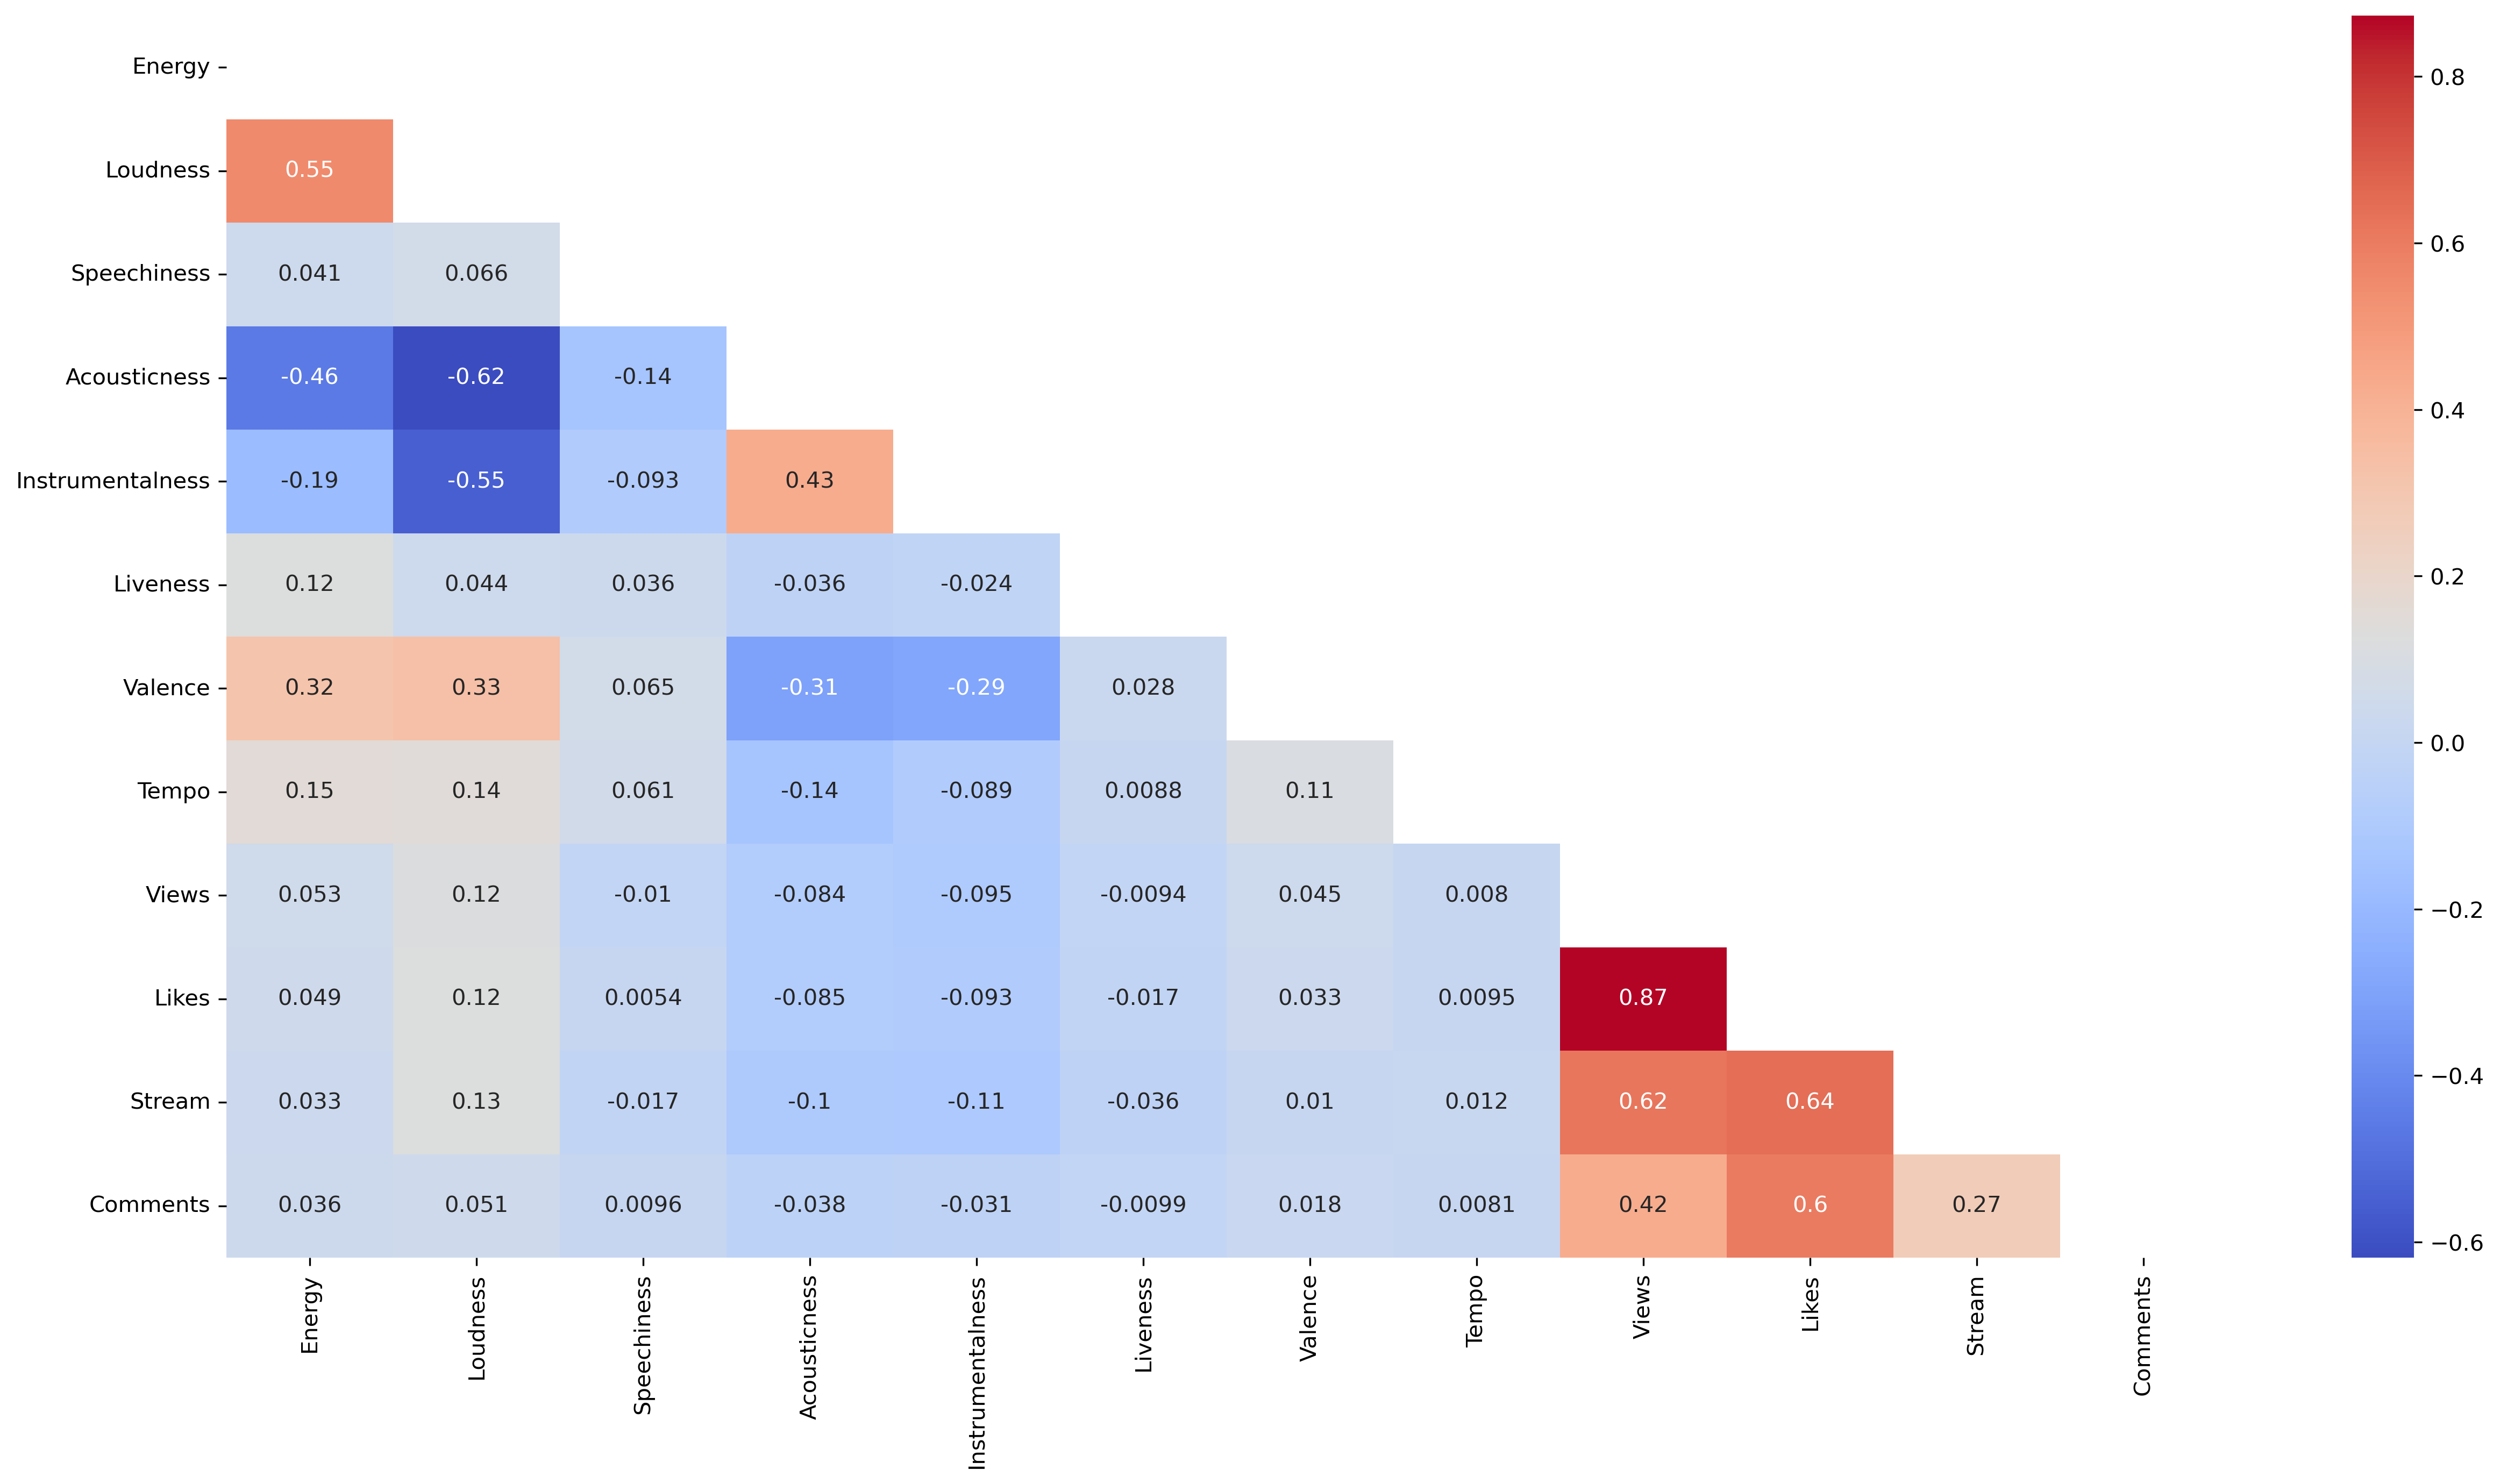

In [18]:
impute.plotCorrelation()

In [19]:
ImputeData = impute.data.copy()

In [22]:
ImputeData

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments
id,,,,,,,,,,,,
0,0.000273,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,2.119939e+07,1.376220e+05,1.998137e+07,3070.000000
1,0.184220,-11.192502,0.090402,0.672221,0.910000,0.034966,0.746000,148.692000,1.848250e+05,5.190000e+03,3.924441e+07,122.000000
2,0.036651,-15.596000,0.051938,0.667628,0.867000,0.001772,0.380000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,122.000000
3,0.209585,-6.251000,0.027700,0.003796,0.009990,0.001000,0.418636,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,24350.000000
4,0.309086,-6.295834,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,3.166880e+08,1.299086e+06,3.486984e+08,31150.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000
23481,0.318585,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,118.433969,4.572846e+07,7.227992e+04,1.365601e+07,448.000000
23482,0.426223,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,59627.196431


In [25]:
len(train)

17170

RECOVER RAIN TEST DATA

In [41]:
trainImp = ImputeData.loc[0:len(train) - 1 ,: ]
testImpTotal = ImputeData.loc[len(train): ,: ]

In [36]:
partialAnswer = partialAnswer.set_index('id')

In [38]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

DATA READY

In [56]:
trainImp_X = trainImp.copy()
trainImp_y = train["Danceability"].copy()

In [68]:
trainImp_X.columns

Index(['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments'],
      dtype='object')

In [47]:
testImp_X= ImputeData[ImputeData.index.isin(partialAnswer.index)]
testImp_y =  partialAnswer.copy()

PREPROCESSING 

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(trainImp_X)
scaledDataPD = pd.DataFrame(scaledData, columns=trainImp_X.columns)

SHUFFLE DATA

In [59]:
from sklearn.utils import shuffle
X, y = shuffle(scaledDataPD, trainImp_y, random_state=0)

MODELO 

In [64]:
class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [70]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.001,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 0,
    'n_jobs': -1
}

In [71]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    OneVsOneClassifier(AdaBoostClassifier(random_state=42), n_jobs=8),
    OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8),
    OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
    OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
    ExtraTreesClassifier(),
    svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(X, np.ravel(y))
    pred = reg.predict(testImp_X)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(testImp_y), np.rint(pred))
    mae = mean_absolute_error(np.ravel(testImp_y), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: OneVsOneClassifier
Processing Regressor: OneVsOneClassifier
Processing Regressor: OneVsOneClassifier
Processing Regressor: OneVsOneClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: SVC


,mae,accuracy
regressors,,
DecisionTreeClassifier,2.890650,0.088748
ExtraTreesClassifier,3.589540,0.093502
LGBWrapper,2.418384,0.129952
RandomForestRegressor,2.700475,0.095087
RandomForestRegressor,2.705230,0.096672
XGBRegressor,2.621236,0.106181
OneVsOneClassifier,4.364501,0.079239
OneVsOneClassifier,3.751189,0.101426
OneVsOneClassifier,3.754358,0.068146


In [69]:
median_preds = np.median(all_preds, axis=0)
median_accuracy = accuracy_score(np.ravel(testImp_y), np.rint(median_preds))
median_mae = mean_absolute_error(np.ravel(testImp_y), np.rint(median_preds))

print("Median Accuracy:", median_accuracy)
print("Median MAE:", median_mae)
print("Median Accuracy:", accuracy_score(np.ravel(testImp_y), np.rint(median_preds)))

Median Accuracy: 0.09984152139461172
Median MAE: 2.7606973058637085
Median Accuracy: 0.09984152139461172


In [ ]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(re